   Import Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sn

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [9]:
#Reading Data from the link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Student Hours and Scores Date: ")
df.head(15)

Student Hours and Scores Date: 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
#Checking For NUll Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


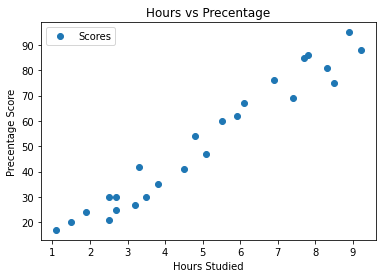

In [12]:
#Representation Of Score
df.plot(x="Hours", y="Scores",style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Precentage Score')
plt.show()

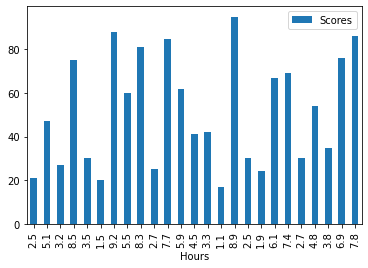

In [13]:
df.plot(x='Hours',y='Scores',kind="bar")
plt.show()

In [14]:
#Corelation Between Variables
df.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [15]:
df.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


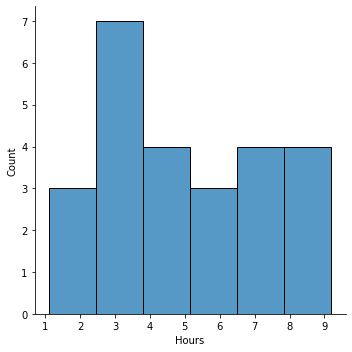

In [16]:
hours=df['Hours']
scores=df['Scores']

sn.displot(hours)
plt.show()

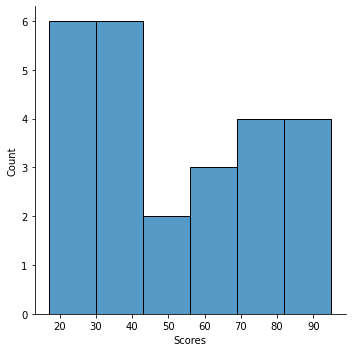

In [17]:
sn.displot(scores)
plt.show()

In [23]:
#Seperating Dependent and Independent Values
X = df['Hours'].values
Y = df['Scores'].values
print('X values: ', X)
print('Y values: ', Y)


X values:  [2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
Y values:  [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


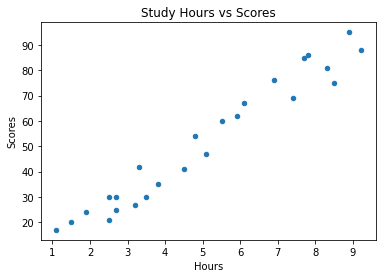

In [24]:
df.plot(x="Hours", y="Scores", kind='scatter',title="Study Hours vs Scores" )
plt.show()

In [26]:
#train test split for Supervised Learning
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state=0)

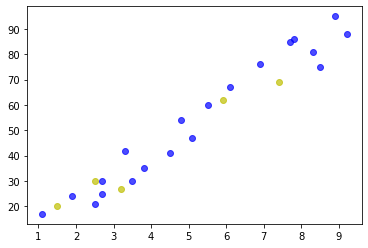

In [33]:
#plotting test and training data points
plt.scatter(X_train,Y_train,label="Training Data",alpha=0.7,color = 'b')
plt.scatter(X_test,Y_test,label="Test Data",alpha=0.7,color = 'y')

In [38]:
#Creating ans Training the Model
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), Y_train)
print("Training Complete.")

Training Complete.


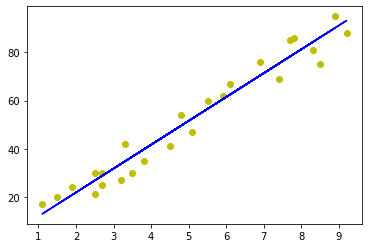

In [44]:
#PLotting The Regression Line
Line = regressor.coef_*X+regressor.intercept_

#plotting for the test data
plt.scatter(X,Y,color='y',label="Data Points")
plt.plot(X,Line,color='b',label="Regression Line")
plt.show()

In [50]:
#Making predictions
prediction = regressor.predict(X_test.reshape(-1,1))
df = pd.DataFrame({'X_test':X_test,'Predicted Score: ': prediction})
df

,X_test,Predicted Score:
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [54]:
#comparision 
#Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': prediction})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


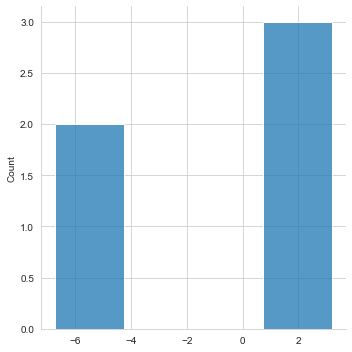

In [55]:
sn.set_style('whitegrid')
sn.displot(Y_test-Y_pred)
plt.show()

In [57]:
#What will be the predicted score if a student studies 9.25 hours/day?
hours = np.array(9.25)
scores = regressor.predict(hours.reshape(-1,1))
print('If a student studies {} hours per day the student will score {}%'.format(hours,scores))

If a student studies 9.25 hours per day the student will score [93.69173249]%


In [73]:
#Evaluting The Model
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error:  3.552713678800501e-16
